# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives





At the end of the experiment you will be able to :

* load and extract features of images

* implement convolutional neural networks using Keras Function API 

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/24_aug_2021_Keras_Chess.mp4" type="video/mp4">
</video>
""")


## Dataset
The dataset chosen for this  experiment is a handmade TalentSprint Chess dataset.The dataset with over 54692 images of Chess Pieces and  the pictures are captured in different angles at 0 degree,15 degree, 30 degree, 45 degree, 60 degree, 75 degree and 90 degree. We have 12 classes in this dataset (BishopBW, BishopColor, KingBW, KingColor, KnightBW, KnightColor, PawnBW,PawnColor, QueenBW, QueenColor, RookBW, RookColor). 


In [ ]:
! wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Asokan_Chess_Pieces.zip
! unzip -qq Asokan_Chess_Pieces.zip
! pip uninstall keras-preprocessing 
! pip install git+https://github.com/keras-team/keras-preprocessing.git 
   

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten,Dropout
from keras.layers.pooling import MaxPooling2D

### Load the data

#### About glob.iglob:

The glob library  provides methods for traversing the file system and returning files that matched a defined set of glob patterns.

**Note:** Refer to  [glob.iglob](https://docs.python.org/3/library/glob.html)

In [ ]:
images_data = glob.glob("/content/Asokan_Chess_Pieces/*/*.png")
len(images_data)

54692

### Extract features and labels from the data

In [ ]:
labels = []
data = []
for image in images_data:
    try:
        img = Image.open(image)
        data.append(np.array(img))
        labels.append(image.split("/")[-1].split('_')[1]+image.split("/")[-1].split('_')[2])
        
    except:
        pass

In [ ]:
len(data), len(labels)

(54692, 54692)

In [ ]:
# Converting lists into numpy arrays
data = np.array(data)
print("data:",data.shape)
labels = np.array(labels)
print("labels:",labels)

data: (54692, 64, 64, 4)
labels: ['KingBW' 'KingBW' 'KingBW' ... 'KnightBW' 'KnightBW' 'KnightBW']


### Label Encoding

Convert the output labels to integer encoded, to understand more about label encoding, refer [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print("Labels before label encoding", np.unique(labels))
labels = le.fit_transform(labels)
print("Labels after label encoding", np.unique(labels))

Labels before label encoding ['BishopBW' 'BishopColor' 'KingBW' 'KingColor' 'KnightBW' 'KnightColor'
 'PawnBW' 'PawnColor' 'QueenBW' 'QueenColor' 'RookBW' 'RookColor']
Labels after label encoding [ 0  1  2  3  4  5  6  7  8  9 10 11]


### Splitting the data into train and test sets 

In [ ]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
len(y_train), len(y_test)

(43753, 10939)

### Data Pre-Processing

In [ ]:
# Convert the integer encoded labels to a one-hot vector since it is a multi-classification problem
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### Convolutional Neural Network

In this section, we will define a convolutional neural network for image classification.

The model receives 64×64x4 images as input, then has a sequence of two convolutional and pooling layers as feature extractors. Followed by a fully connected layer to interpret the features and an output layer with a softmax activation for classification.

In [ ]:
input = Input(shape=(64,64,4))
conv1 = Conv2D(32, kernel_size=5, activation='relu')(input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
drp1 = Dropout(0.25)(pool1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(drp1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
drp2 = Dropout(0.25)(pool2)
flat = Flatten()(drp2)
fc1 = Dense(128, activation='relu')(flat)
fc2 = Dense(64, activation = 'relu')(fc1)
output = Dense(12, activation='softmax')(fc2)
model = Model(inputs=input, outputs=output)

# Summarize layers
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 4)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 32)        3232      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0     


Compiling the CNN
 
* The first parameter is to get the optimal set of weights in the neural network. Adam is really efficient  to use for large amount of data.
* The second parameter is the loss function. Since our classes are categorical, we use  categorical_crossentopy loss function. 
* The final argument is the criterion to evaluate the model. In this case we use the accuracy.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
	 metrics=['accuracy'])

### Training the Model

* First parameter contains train images
* Second parameter contains labels
* Epochs represents the number of times we’re going to pass our full dataset through the CNN.

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=5)

Epoch 1/5
1368/1368 [==============================] - 277s 202ms/step - loss: 1.9780 - accuracy: 0.8220
Epoch 2/5
1368/1368 [==============================] - 274s 200ms/step - loss: 0.2411 - accuracy: 0.9195
Epoch 3/5
1368/1368 [==============================] - 269s 197ms/step - loss: 0.0416 - accuracy: 0.9818
Epoch 4/5
1368/1368 [==============================] - 265s 194ms/step - loss: 0.0716 - accuracy: 0.9760
Epoch 5/5
1368/1368 [==============================] - 264s 193ms/step - loss: 0.0596 - accuracy: 0.9802


### Evaluate the model

* First parameter is predicted labels of the test images
* Second parameter is actual labels of the test labels

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat) 

342/342 [==============================] - 18s 52ms/step - loss: 0.0204 - accuracy: 0.9888


### Predict Labels

In [ ]:
preds = model.predict(X_test)

In [ ]:
predicted_classes = np.argmax(np.round(preds),axis=1)

In [ ]:
predicted_classes.shape,y_test.shape

((10939,), (10939,))

### Visualizing the correct predicted images  with actual class

Found 10816 correct predictions out of 10939 test samples


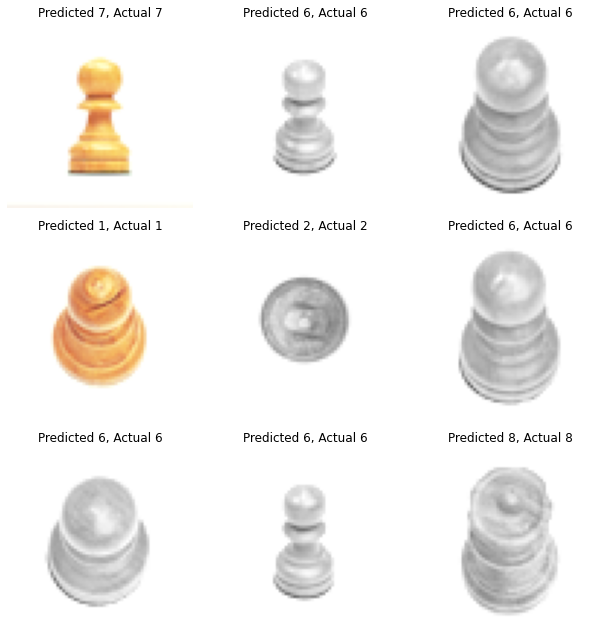

In [ ]:
class_names = {i:cn for i, cn in enumerate(['BishopBW', 'BishopColor', 'KingBW', 'KingColor', 'KnightBW',
       'KnightColor', 'PawnBW', 'PawnColor', 'QueenBW', 'QueenColor',
       'RookBW', 'RookColor']) }
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct predictions" % len(correct), "out of %d test samples" % (y_test.shape))
plt.figure(figsize=(9,9))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct])
    plt.axis('off')
    plt.title("Predicted {}, Actual {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

### Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given 12 classes.

In [ ]:
class_names = {i:cn for i, cn in enumerate(['BishopBW', 'BishopColor', 'KingBW', 'KingColor', 'KnightBW',
       'KnightColor', 'PawnBW', 'PawnColor', 'QueenBW', 'QueenColor',
       'RookBW', 'RookColor']) }
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       827
     Class 1       1.00      1.00      1.00      1078
     Class 2       1.00      1.00      1.00      1075
     Class 3       1.00      1.00      1.00      1012
     Class 4       0.89      1.00      0.94      1036
     Class 5       1.00      0.88      0.94      1015
     Class 6       1.00      1.00      1.00      1086
     Class 7       1.00      1.00      1.00       879
     Class 8       1.00      1.00      1.00      1027
     Class 9       1.00      1.00      1.00      1195
    Class 10       1.00      1.00      1.00       169
    Class 11       1.00      1.00      1.00       540

    accuracy                           0.99     10939
   macro avg       0.99      0.99      0.99     10939
weighted avg       0.99      0.99      0.99     10939

